In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
train_df = pd.read_csv('./data/train_data.csv')
val_df = pd.read_csv('./data/val_data.csv')
sample_df = pd.read_csv('./data/sample_submission.csv')
#train_df.dropna(inplace=True)

In [4]:
centerpoint= (47.598963, -122.252133)  #center point of city center

In [5]:
train_df.describe()

,Unique_idx,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04
mean,10821.135454,4.577035e+09,3.366455,2.111567,2074.586293,1.521099e+04,1.493522,0.007750,0.234182,3.410700,...,1782.821920,291.764372,1970.915095,84.596992,98078.057779,47.559674,-122.214147,1984.131463,12790.231984,5.378806e+05
std,6233.894051,2.877097e+09,0.934061,0.765353,903.771540,4.282989e+04,0.540177,0.087696,0.763897,0.651334,...,816.765091,441.081555,29.418996,402.087484,53.559522,0.138770,0.140738,681.613827,27728.922431,3.539798e+05
min,0.000000,1.000102e+06,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,7.500000e+04
25%,5408.500000,2.122785e+09,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470225,-122.329000,1490.000000,5100.000000,3.220000e+05
50%,10857.500000,3.904921e+09,3.000000,2.250000,1920.000000,7.605000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.231000,1840.000000,7615.000000,4.500000e+05
75%,16222.500000,7.308600e+09,4.000000,2.500000,2550.000000,1.063075e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.677700,-122.125000,2360.000000,10067.500000,6.450000e+05
max,21612.000000,9.900000e+09,33.000000,6.750000,9640.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,5.570000e+06


In [6]:
train_df.head(3)

,Unique_idx,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7291,4058200630,20141002T000000,3,1.75,2190,7021,1.0,0,2,...,1390,800,1953,0,98178,47.5033,-122.232,2180,7155,353000
1,14835,3613600150,20150105T000000,3,2.50,2370,6840,2.0,0,0,...,2370,0,1987,0,98119,47.6503,-122.366,1590,4400,300523
2,15880,7170200080,20140617T000000,2,1.00,1230,3800,1.0,0,0,...,1230,0,1928,0,98115,47.6797,-122.292,1610,3800,435000


In [7]:
train_df.dtypes

Unique_idx         int64
id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

Text(0.5, 1.0, 'price box plot')

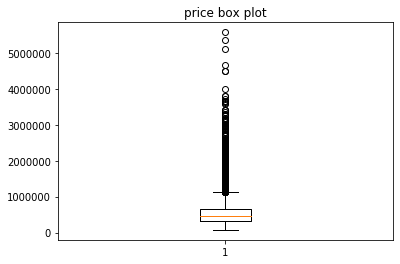

In [8]:
plt.boxplot(train_df.iloc[:,-1])
plt.title('price box plot')

Text(0.5, 1.0, 'price histogram')

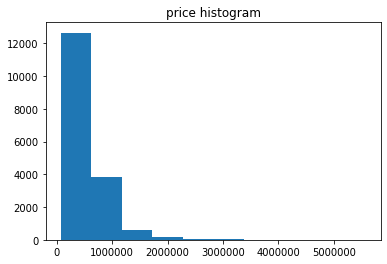

In [9]:
plt.hist(train_df.iloc[:,-1])
plt.title('price histogram')

In [10]:
val_df.describe()

,Unique_idx,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4323.000000,4.323000e+03,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.00000,4323.000000,4323.000000,4323.000000,4323.00000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,10745.465186,4.593364e+09,3.388388,2.127516,2101.151053,14690.944020,1.497455,0.006708,0.234791,3.404349,7.66019,1810.663197,290.487856,1971.365256,83.62341,98077.467962,47.561566,-122.212893,1996.235485,12681.360398
std,6261.132211,2.874737e+09,0.913787,0.789071,974.727198,35225.710884,0.539288,0.081639,0.776012,0.648424,1.18644,871.662329,448.548670,29.190990,400.08771,53.290075,0.137739,0.141201,700.292240,25537.740132
min,4.000000,1.200019e+06,0.000000,0.000000,290.000000,649.000000,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.00000,98001.000000,47.180800,-122.511000,460.000000,651.000000
25%,5380.500000,2.124059e+09,3.000000,1.750000,1440.000000,5087.500000,1.000000,0.000000,0.000000,3.000000,7.00000,1200.000000,0.000000,1952.000000,0.00000,98033.000000,47.472800,-122.325000,1490.000000,5114.500000
50%,10638.000000,3.904961e+09,3.000000,2.250000,1900.000000,7650.000000,1.500000,0.000000,0.000000,3.000000,7.00000,1580.000000,0.000000,1976.000000,0.00000,98065.000000,47.574000,-122.228000,1850.000000,7656.000000
75%,16134.500000,7.309100e+09,4.000000,2.500000,2550.000000,10800.000000,2.000000,0.000000,0.000000,4.000000,8.00000,2220.000000,570.000000,1997.000000,0.00000,98117.000000,47.679450,-122.126000,2360.000000,10157.500000
max,21608.000000,9.839301e+09,9.000000,8.000000,13540.000000,920423.000000,3.500000,1.000000,4.000000,5.000000,13.00000,9410.000000,4130.000000,2015.000000,2015.00000,98199.000000,47.777500,-121.315000,6210.000000,411962.000000


In [11]:
dist_df = train_df.loc[:,['Unique_idx','lat','long','price']]
dist_df['ss_latLon'] = dist_df['lat']*dist_df['lat'] + dist_df['long']*dist_df['long']
print(dist_df['ss_latLon'])
dist_df['ss_latLon'] = np.sqrt(dist_df['ss_latLon'])
dist_df['ss_latLon']


#dist_df['price'] = dist_df['price'].astype(float) 

0        17197.225335
1        17243.989046
2        17228.687056
3        17192.722296
4        17247.243847
             ...     
17285    17143.899930
17286    17238.726556
17287    17152.078905
17288    17254.204171
17289    17199.103160
Name: ss_latLon, Length: 17290, dtype: float64


0        131.138192
1        131.316370
2        131.258093
3        131.121022
4        131.328762
            ...    
17285    130.934716
17286    131.296331
17287    130.965946
17288    131.355259
17289    131.145351
Name: ss_latLon, Length: 17290, dtype: float64

0        0.097759
1        0.124905
2        0.090044
3        0.075151
4        0.148727
           ...   
17285    0.262054
17286    0.117907
17287    0.240193
17288    0.206192
17289    0.085282
Name: dist_latLon, Length: 17290, dtype: float64


Text(0.5, 1.0, 'dist from city center vs price')

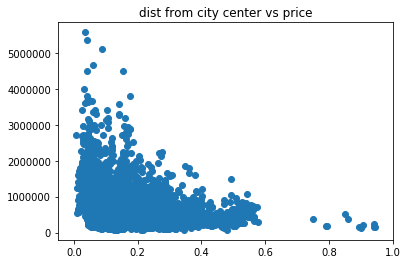

In [12]:
dist_df = train_df.loc[:,['Unique_idx','lat','long','price']]

dist_df['dist_latLon'] = np.sqrt(np.square(dist_df['lat']- centerpoint[0]) + np.square(dist_df['long']-centerpoint[1]))

print(dist_df['dist_latLon'])
plt.scatter(dist_df['dist_latLon'], dist_df['price'])
plt.title('dist from city center vs price')
#dist_df['price'] = dist_df['price'].astype(float) 

In [13]:

plt.scatter(dist_df['ss_latLon'], dist_df['price'])

KeyError: 'ss_latLon'

In [ ]:
plt.scatter(dist_df['lat'], dist_df['price'])

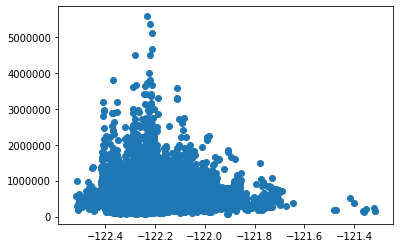

In [14]:
plt.scatter(dist_df['long'], dist_df['price'])

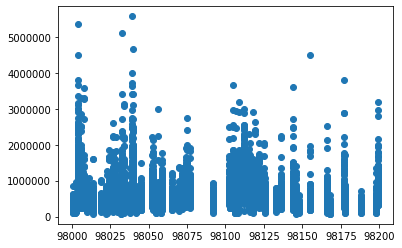

In [15]:
plt.scatter(train_df['zipcode'], train_df['price'])

In [16]:
dist_df
train_df.iloc[:1000,np.r_[3:8,21]]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.75,2190,7021,1.0,353000
1,3,2.50,2370,6840,2.0,300523
2,2,1.00,1230,3800,1.0,435000
3,4,2.25,2510,9963,1.0,800000
4,3,1.00,1160,7491,1.0,417500
...,...,...,...,...,...,...
995,4,2.50,3030,12590,1.5,1050000
996,4,1.75,1400,54014,1.5,242025
997,3,2.25,1620,10850,1.0,250000
998,3,2.50,1470,1741,2.0,454280


In [17]:
#sns.pairplot(train_df.iloc[:500,np.r_[12:20,21]] )

In [18]:
#just to confirm data 
#print(train_df.iloc[0:12000,-1])
#print(train_df.iloc[0:12000,3:-1])

In [19]:
percent = 0.7  #choose percent to split 
n= train_df.shape[0] #number of rows in data set before splitting
s= math.floor(percent * n)
y= train_df.iloc[0:s,-1]
X = train_df.iloc[0:s,3:-1]

y_test= train_df.iloc[s:n,-1]
X_test = train_df.iloc[s:n,3:-1]

In [20]:
model=sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              7515.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        16:31:30   Log-Likelihood:                     -1.6414e+05
No. Observations:               12103   AIC:                                  3.283e+05
Df Residuals:                   12086   BIC:                                  3.284e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [21]:
model_skl= LinearRegression().fit(X,y)
print('Rsquared(sklearn) = ', model_skl.score(X,y))
yhat_skl = model_skl.predict(X_test)
yhat_skl = yhat_skl.astype(int)
delta = yhat_skl - y_test
mse_skl = np.sqrt(np.mean(np.square(delta)))
print('mse_skl = ', mse_skl)

Rsquared(sklearn) =  0.7060951515162013
mse_skl =  204175.4346376165


In [22]:
#compare to test data
yhat = model.predict(X_test)
yhat = yhat.astype(int)
#print(y_test)
#print(yhat)
#print(np.abs(yhat-y_test))
delta = yhat - y_test
mse = np.sqrt(np.mean(np.square(delta)))
print('mse (stats model) = ', mse)

mse (stats model) =  204157.13247734425


In [23]:
#both stats model and sklearn have almost the as mse
mse/mse_skl


0.9999103606155915